In [1]:
ls

 23-014-AG_2thomegascan_long.brml             Al-content_fit.txt
 23-014-AG_2thomegascan_long_exported.xy      a_vs_x_strained.dat
 23-016-AG_2thomegascan_long.brml             myfirstfigure.pdf
 23-016-AG_2thomegascan_long_exported.xy      peakpos.pdf
 23-017-AG_2thomegascan_long.brml             plot+fit.ipynb
 23-017-AG_2thomegascan_long_exported.xy      tth_vs_x_strained.dat
 23-018-AG_01_2thomscan_exported.xy           Untitled1.ipynb
'23-019-AG_2thomscan long scan_exported.xy'  'Untitled Folder'/
 23-020-AG_2thomscan_exported.xy              Untitled.ipynb


In [24]:
#!pip install ipympl

# markdown
this is a **markdown** cell. It has many features
- bullet list
- $\TeX$ rendering
- code mode: `def some_function()`



To switch the cell mode, use the drag-drop menu above or the shortcuts

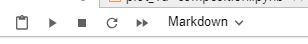





In [3]:
%matplotlib widget
# %matplotlib notebook # deprecated

In [4]:
import numpy
import matplotlib.pyplot as plt

load the data and skip one row:

In [ ]:
smth = numpy.loadtxt("23-019-AG_2thomscan long scan_exported.xy", skiprows=1)

In [6]:
smth

array([[10.       ,  4.       ],
       [10.004    ,  4.       ],
       [10.008    ,  1.5      ],
       ...,
       [49.9920019,  1.5      ],
       [49.9960019,  3.       ],
       [50.0000019,  3.       ]])

In [7]:
smth.shape

(10001, 2)

In [8]:
smth[0] # show the content of the first row

array([10.,  4.])

In [9]:
x = smth[:,0] # access the first column
Intensity = smth[:,1] # access the second column

In [25]:
Intensity.sum() # compute sum as example

27146160.049999997

In [26]:
Intensity.std() # compute max

83795.0557464806

In [27]:
Intensity # short representation

array([4. , 4. , 1.5, ..., 1.5, 3. , 3. ])

Text(0.5, 0, '2$\\theta$ (deg)')

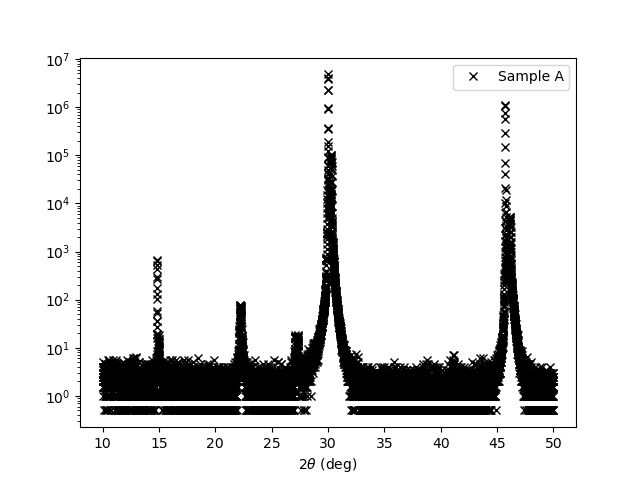

In [28]:
plt.figure() # new figure (good practice to put it)

plt.plot(x, Intensity, color="black", marker="x", linestyle="", label="Sample A")
plt.yscale("log")

plt.legend()
plt.xlabel("2$\\theta$ (deg)")


In [14]:
mymask = (x > 45) * (x < 47) # * corresponds to AND, + corresponds to OR

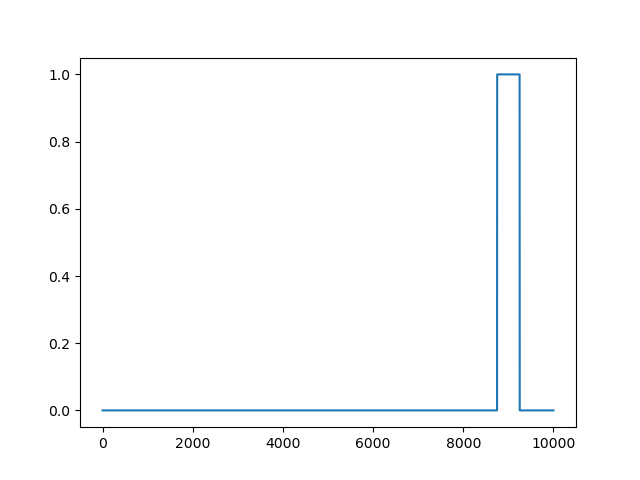

In [15]:
plt.figure()
plt.plot(mymask)

In [16]:
xsel = x[mymask]
Isel = Intensity[mymask]

In [29]:
Isel.argmax() # find the index of the highest value

182

In [18]:
imax = Isel.argmax()
print("the row of the maximum is ", imax)
print("the corresponding x-value is:", xsel[imax])

the row of the maximum is  182
the corresponding x-value is: 45.7280016969889


Text(0.5, 0, '2$\\theta$ (deg)')

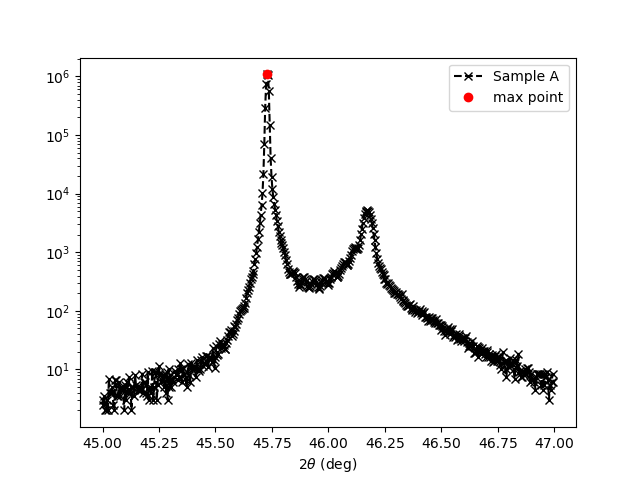

In [19]:
plt.figure()
plt.plot(xsel, Isel, color="black", marker="x", linestyle="--", label="Sample A")
plt.plot(xsel[imax], Isel[imax], color="red", marker="o", linestyle="", label="max point")
plt.yscale("log")

plt.legend()
plt.xlabel("2$\\theta$ (deg)")

In [20]:
mindist = 0.15
mask_film = abs(xsel - xsel[imax]) > mindist

x_film = xsel[mask_film]
I_film = Isel[mask_film]


imax_film = I_film.argmax()
print("the row of the maximum is ", imax_film)
print("the corresponding x-value is:", x_film[imax_film])

the row of the maximum is  218
the corresponding x-value is: 46.1720017180778


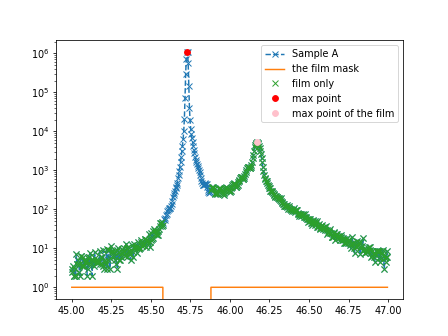

In [23]:
plt.figure(dpi=70)
plt.plot(xsel, Isel, marker="x", linestyle="--", label="Sample A")
plt.plot(xsel, mask_film, label="the film mask")
plt.plot(x_film, I_film, marker="x", linestyle="", label="film only")

plt.plot(xsel[imax], Isel[imax], color="red", marker="o", linestyle="", label="max point")
plt.plot(x_film[imax_film], I_film[imax_film], color="pink", marker="o", linestyle="", label="max point of the film")


plt.yscale("log")
plt.legend()

plt.savefig("myfirstfigure.pdf")
